<img style="float:right" src="images/logo_va.png" /> 

# Visione Artificiale
## Esercitazione: Deep learning

### Sommario
* Utilizzo di una rete neurale già addestrata in OpenCV
* Predisposizione dell'input
* Interpretare l'ouput di YOLO v3
* Non-maximum suppression

Iniziamo con l'importazione dei moduli che ci serviranno: `NumPy`, `OpenCV`, `va`. Importiamo anche la funzione `interact` di Jupyter.

In [1]:
import numpy as np
import cv2 as cv
import va
from ipywidgets import interact

In questa esercitazione utilizzeremo una DNN per object-detection: YOLO v3 \[1\]. Prima di tutto è necessario scaricare il file con i pesi della rete già addestrata (247 MB) da questo indirizzo: https://pjreddie.com/media/files/yolov3.weights. Il file andrà salvato nella sottocartella "dnn", dove è già presente "yolov3.cfg" (configurazione della rete) e "yolov3.txt" (nomi delle classi degli oggetti su cui è stata addestrata).


\[1\] Joseph Redmon and Ali Farhadi, [YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767), 2018.

<img style="float:left" src="images/ar.png" />**Esercizio 1** - Utilizzando la funzione OpenCV `cv.dnn.readNet()`, caricare da file la rete neurale, passando il path "dnn/yolov3.weights" come `model` e il path "dnn/yolov3.cfg" come `config`: memorizzare il valore di ritorno (il riferimento alla rete in memoria) in una variabile `net`. Leggere quindi i nomi delle 80 classi dal file di testo "dnn/yolov3.txt", che contiene un nome per ogni riga: memorizzare i nomi in una lista Python di stringhe `class_names`: i nomi delle classi non devono contenere il carattere new line ('\n').  
Suggerimenti: ci sono vari modi per leggere un file di testo in Python, si possono trovare molti esempi su Internet. Fra i modi più semplici, c'è l'utilizzo della funzione `open()`, che restituisce uno `stream`, che a sua volta mette a disposizione il metodo `read()`; infine può essere utile il metodo `splitlines()` della classe `str`.

In [2]:
# --- Svolgimento Esercizio 1: Inizio --- #

net = cv.dnn.readNet("dnn/yolov3.weights", "dnn/yolov3.cfg")

class_names = []

with open("dnn/yolov3.txt") as fp:
    # for line in fp.readlines():
    #     class_names.append(line.strip())
    class_names = [line.strip() for line in fp.readlines()]

# --- Svolgimento Esercizio 1: Fine --- #

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente esegue alcuni controlli sui dati.

In [3]:
va.test_dnn_1(net, class_names)

<img style="float:left" src="images/ar.png" />**Esercizio 2** - In previsione di dover disegnare con colori diversi le posizioni di oggetti di classi diverse in un'immagine, creare una lista `class_colors` di colori, dove il colore $i-$esimo è una tupla $(B_i, G_i, R_i)$ corrispondente ai seguenti valori HSV: $H_i = (i \cdot 29)\ mod\ 180, S_i=200, V_i=255$. I valori sono espressi negli stessi range utilizzati in OpenCV: $H\in[0,180), S\in[0,255], V\in[0,255]$. In sostanza l'obiettivo dell'esercizio è ottenere una lista di colori in formato BGR, con saturazione e luminosità costanti e con lo hue di ogni colore ruotato di 58° rispetto a quello del precedente. N.B. Assicurarsi che i valori in ciascuna tupla siano di tipo *int* (intero Pyton) e non di altri tipi (ad es. np.int32).
Suggerimento: una soluzione relativamente semplice consiste nell'utilizzare la funzione OpenCV per convertire immagini da HSV a BGR, facendo però attenzione al fatto che il risultato non deve essere un'immagine o una lista di immagini, ma una lista di tuple (B, G, R).

In [4]:
# --- Svolgimento Esercizio 2: Inizio --- #

img_colors_hsv = np.array([[((i * 29) % 180, 200, 255) for i in range(len(class_names))]], dtype=np.uint8)
# print(img_colors_hsv)
print(img_colors_hsv.shape)

# class_colors = [(..., ..., ...), ..., (..., ..., ...)]
img_colors_bgr = cv.cvtColor(img_colors_hsv, cv.COLOR_HSV2BGR)
print(img_colors_bgr.shape)
img_colors_bgr = img_colors_bgr.astype(np.int_)[0, :]
print(img_colors_bgr.shape)
class_colors = [tuple(el.tolist()) for el in img_colors_bgr]
print(class_colors)
print(type(class_colors[0][0]))

# --- Svolgimento Esercizio 2: Fine --- #

(1, 80, 3)
(1, 80, 3)
(80, 3)
[(54, 54, 255), (54, 248, 255), (54, 255, 68), (235, 255, 54), (255, 81, 54), (255, 54, 221), (94, 54, 255), (54, 208, 255), (54, 255, 108), (195, 255, 54), (255, 121, 54), (255, 54, 181), (134, 54, 255), (54, 168, 255), (54, 255, 148), (155, 255, 54), (255, 161, 54), (255, 54, 141), (174, 54, 255), (54, 128, 255), (54, 255, 188), (115, 255, 54), (255, 201, 54), (255, 54, 101), (214, 54, 255), (54, 88, 255), (54, 255, 228), (75, 255, 54), (255, 241, 54), (255, 54, 61), (254, 54, 255), (61, 54, 255), (54, 241, 255), (54, 255, 74), (228, 255, 54), (255, 88, 54), (255, 54, 215), (101, 54, 255), (54, 201, 255), (54, 255, 114), (188, 255, 54), (255, 128, 54), (255, 54, 175), (141, 54, 255), (54, 161, 255), (54, 255, 154), (148, 255, 54), (255, 168, 54), (255, 54, 135), (181, 54, 255), (54, 121, 255), (54, 255, 194), (108, 255, 54), (255, 208, 54), (255, 54, 95), (221, 54, 255), (54, 81, 255), (54, 255, 234), (68, 255, 54), (255, 248, 54), (255, 54, 54), (255, 5

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente controlla che tutti i colori siano corretti e li visualizza.


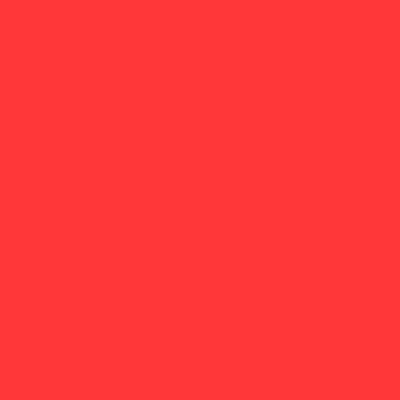
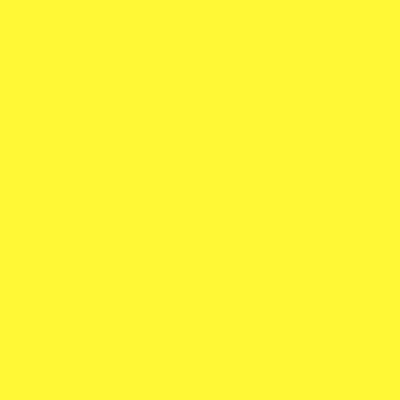
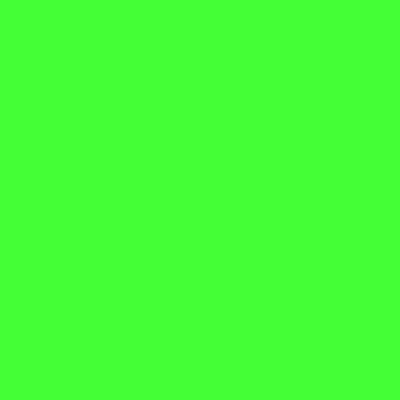
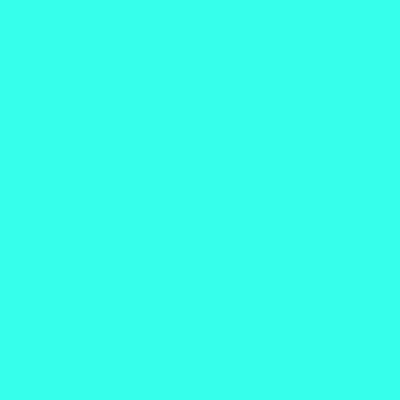
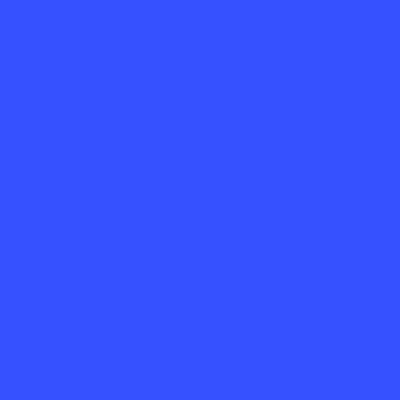
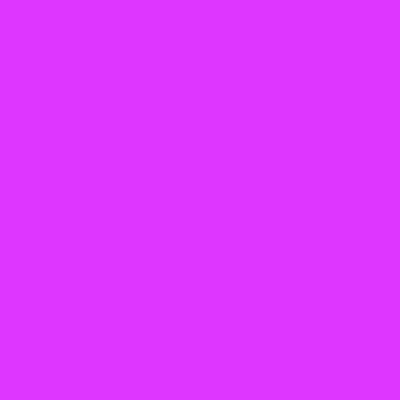
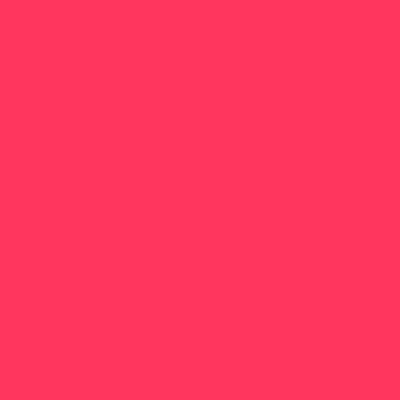
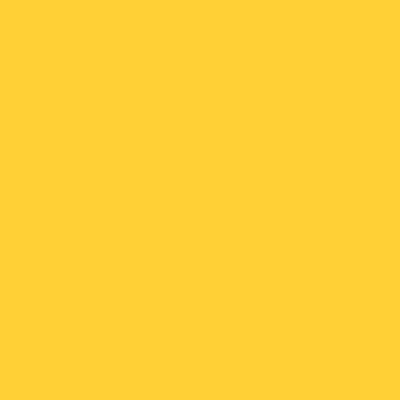
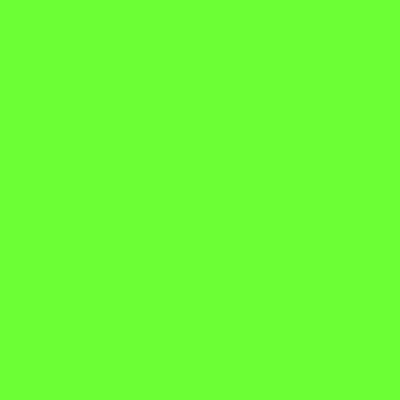
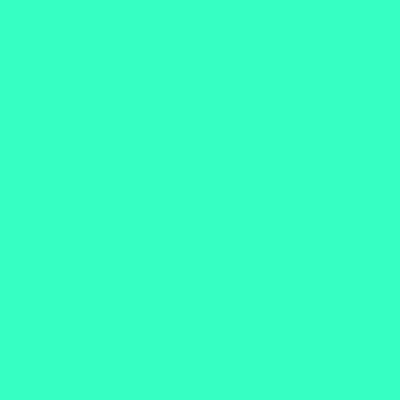
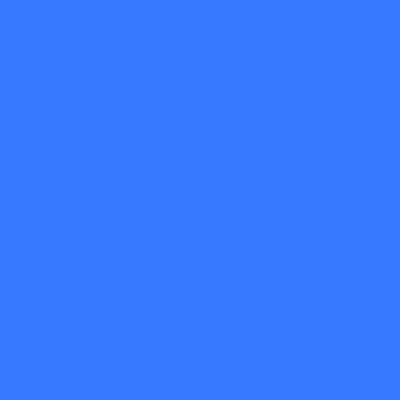
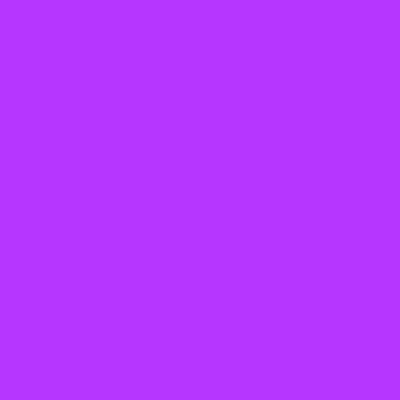
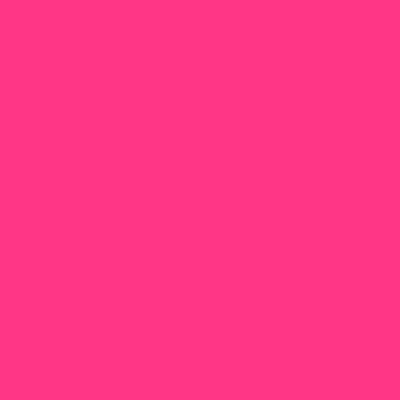
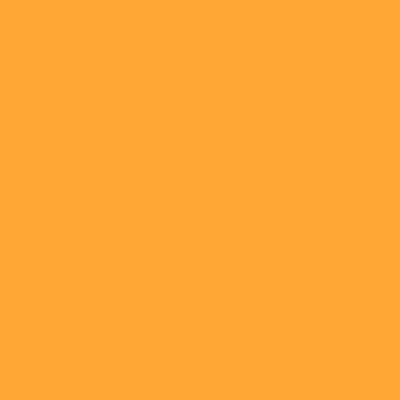
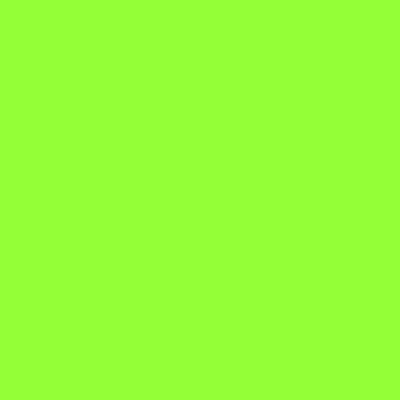
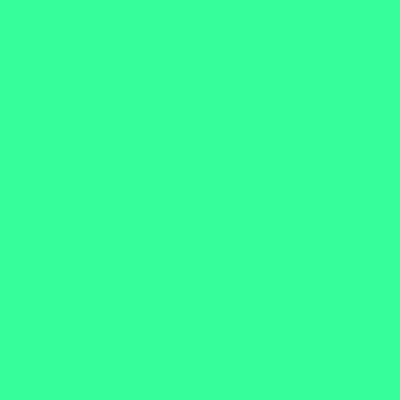
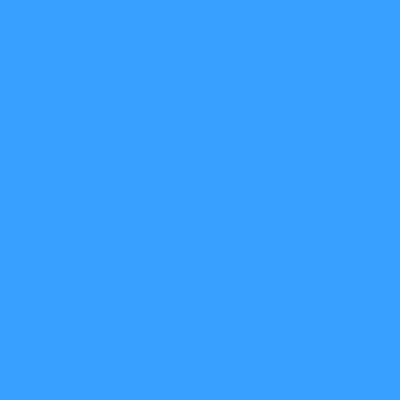
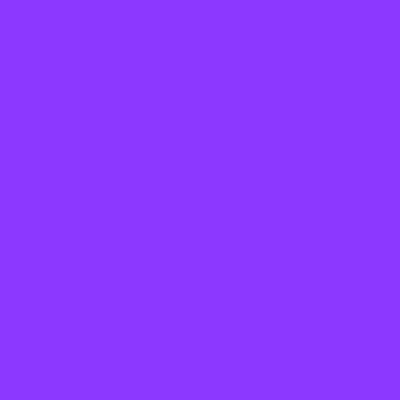
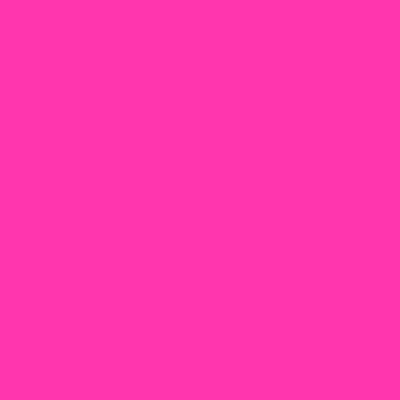
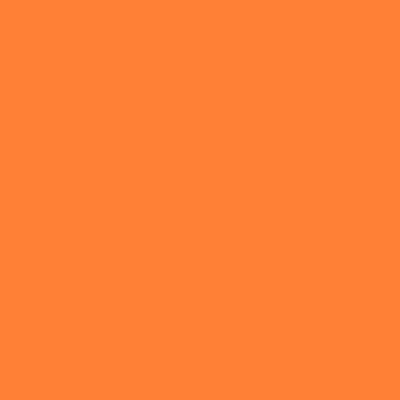
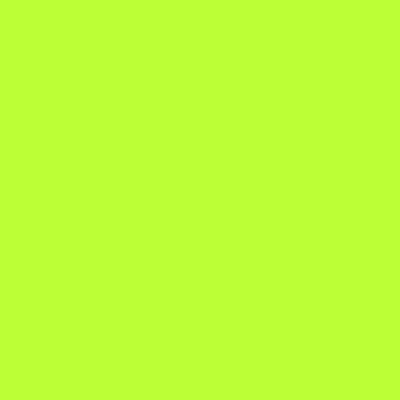
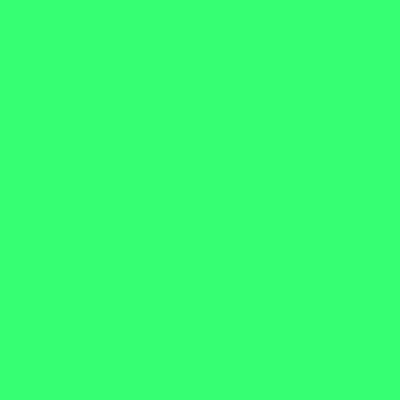
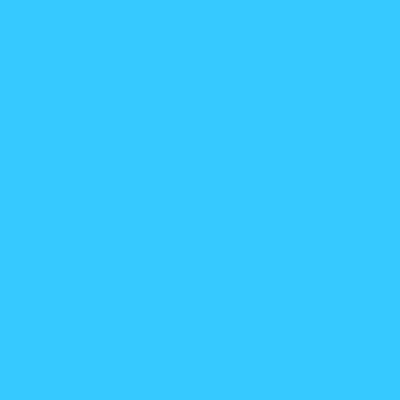
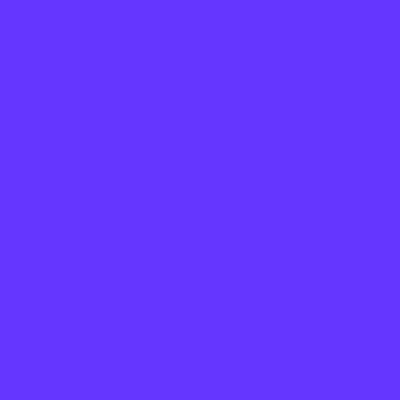
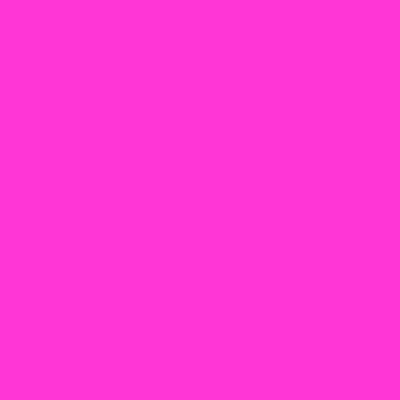
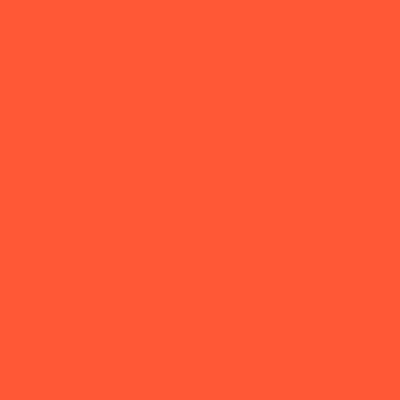
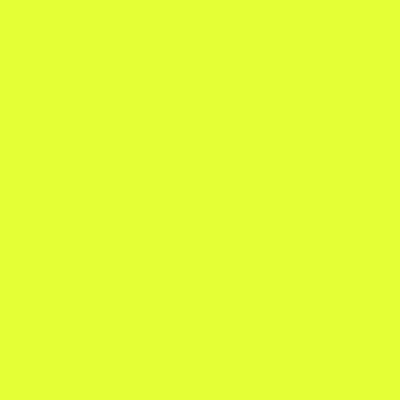
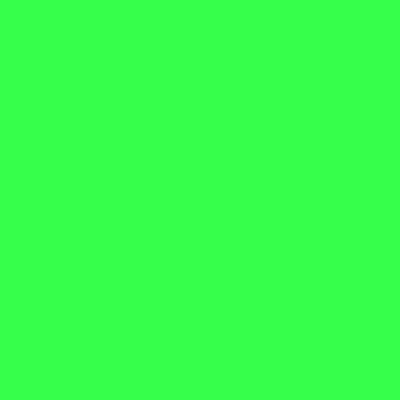
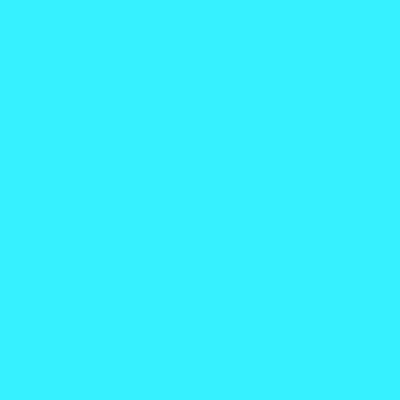
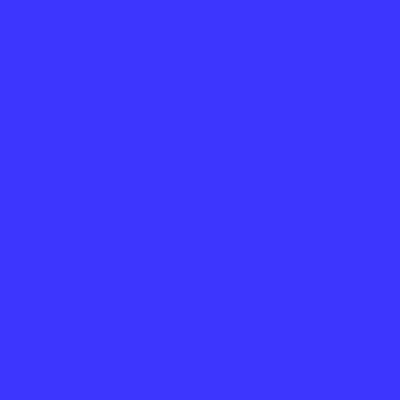
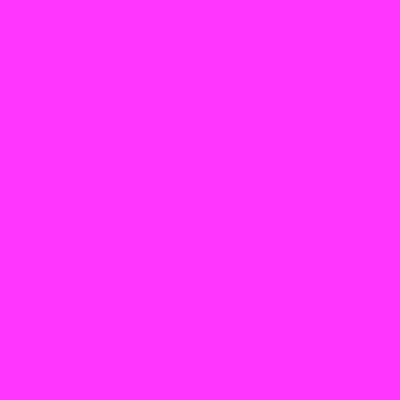
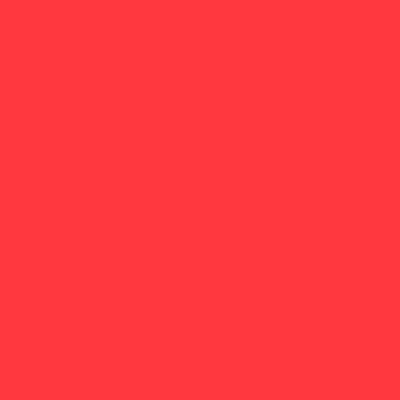
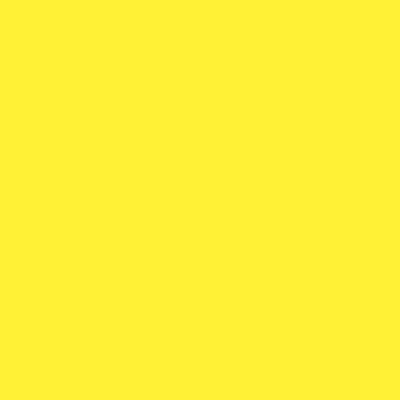
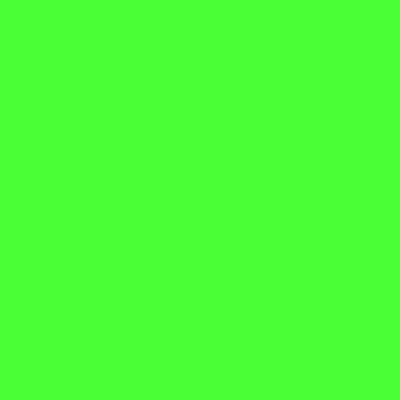
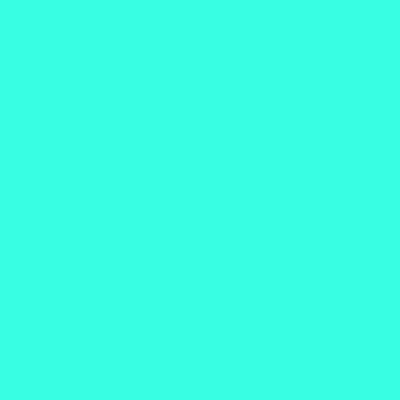
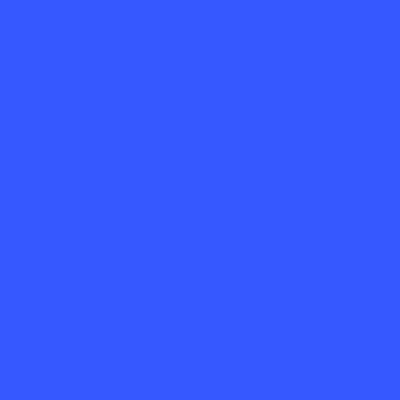
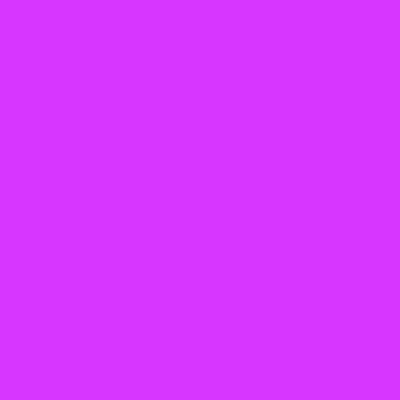
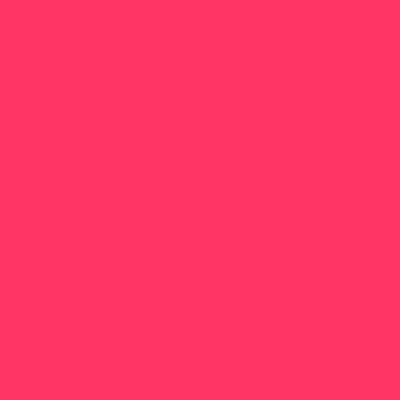
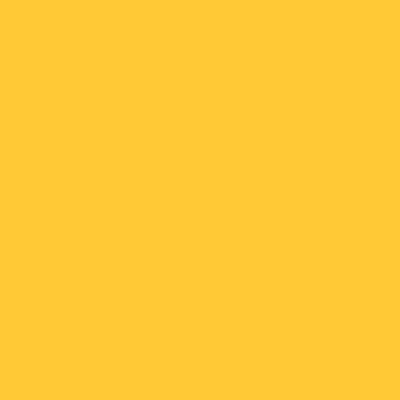
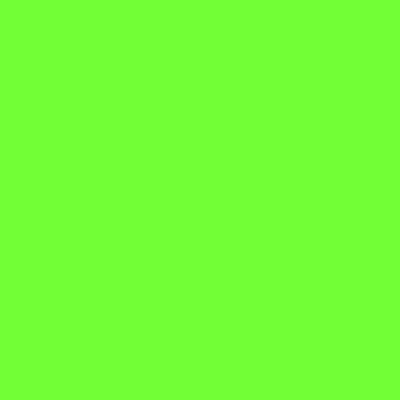
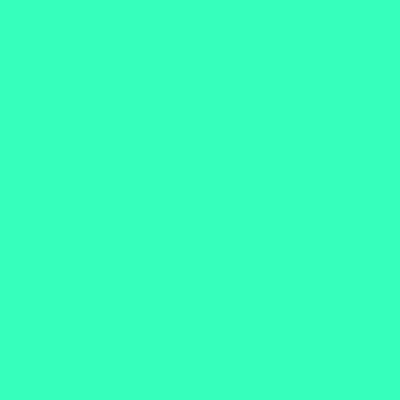
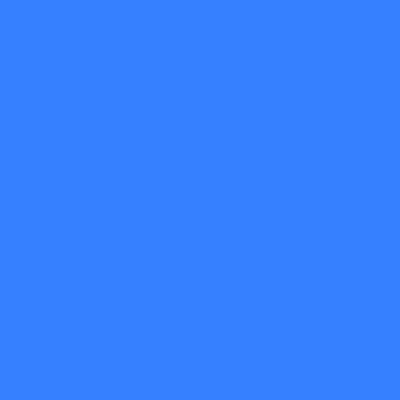
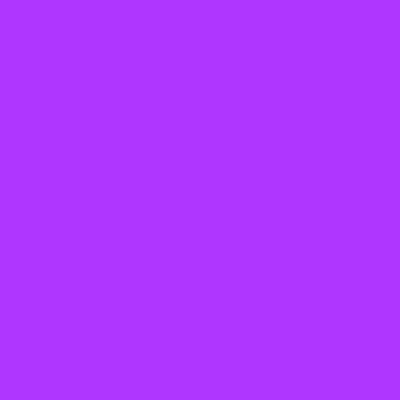
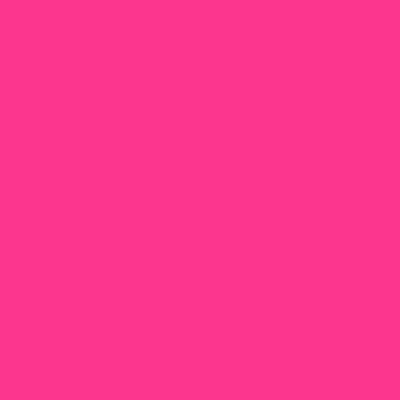
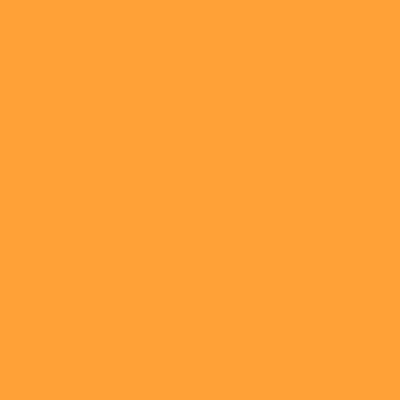
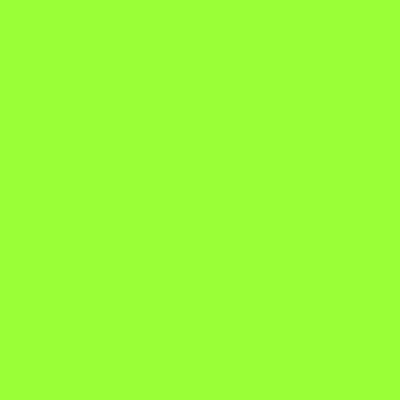
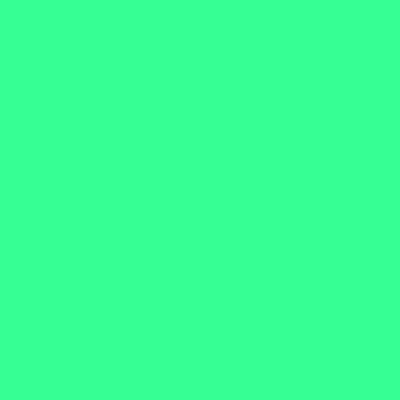
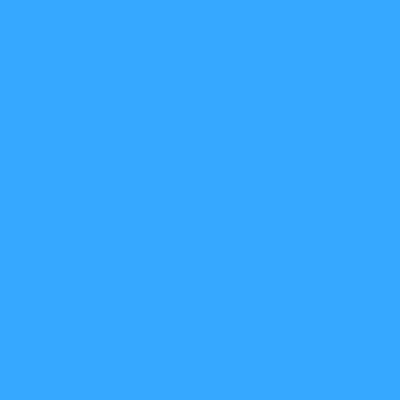
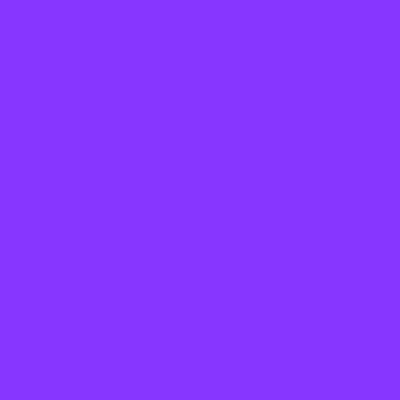
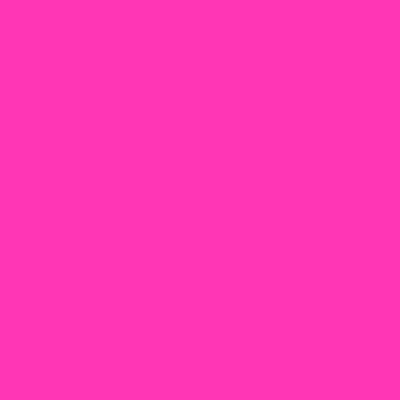
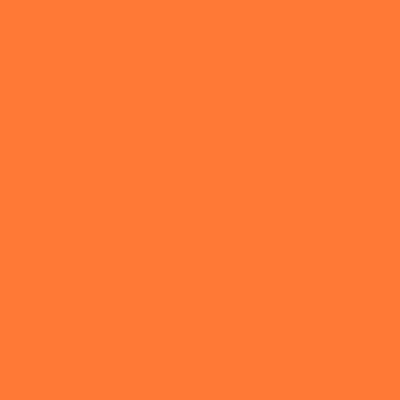
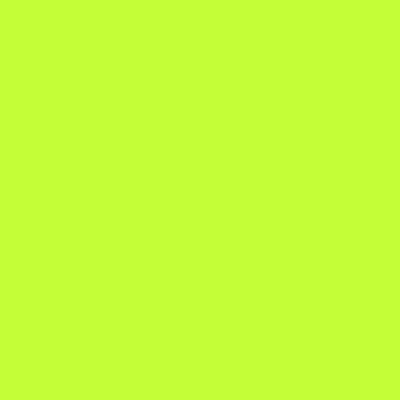
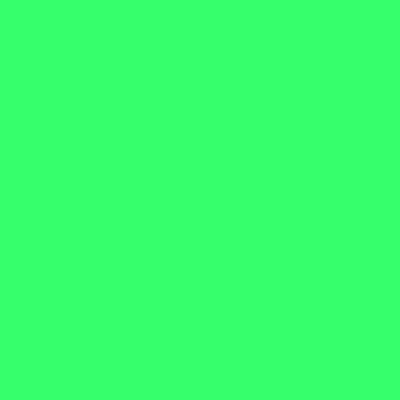
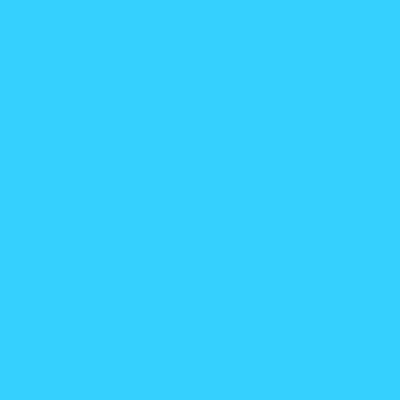
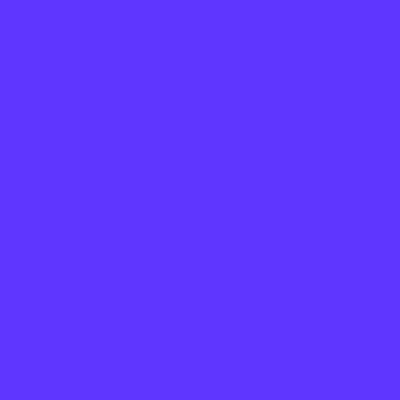
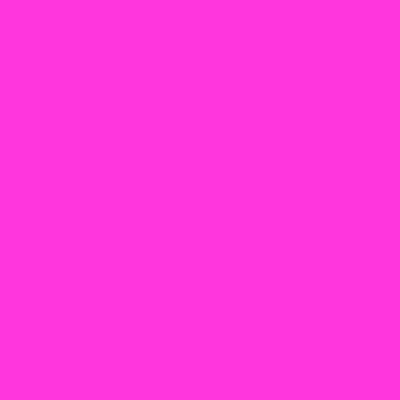
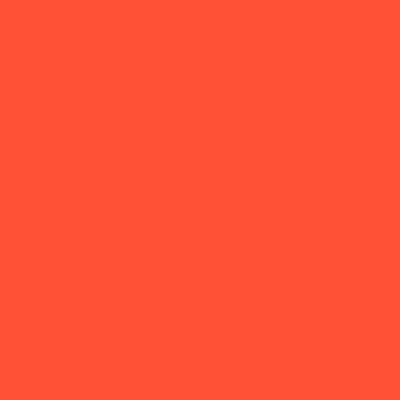
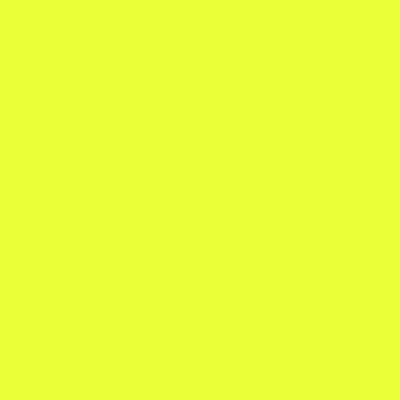
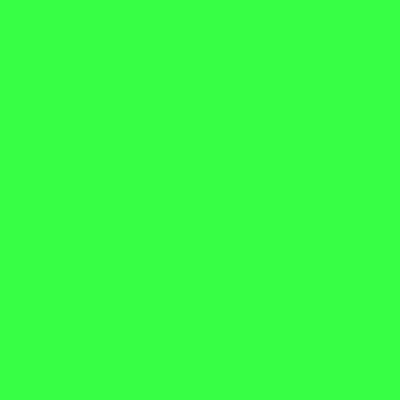
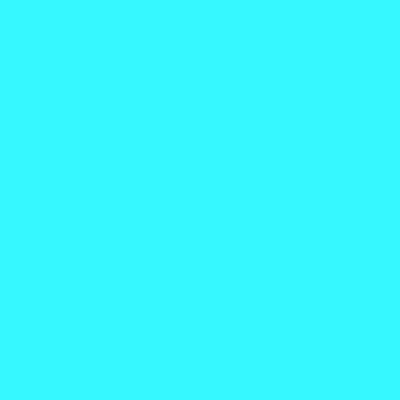
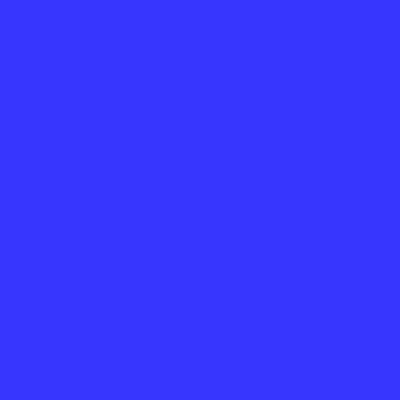
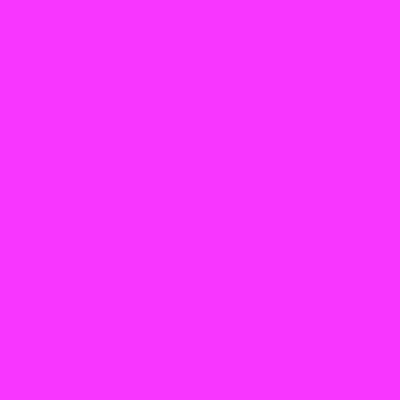
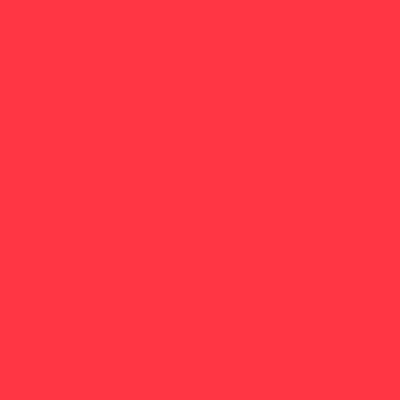
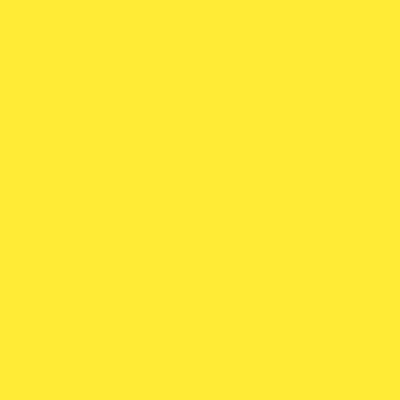
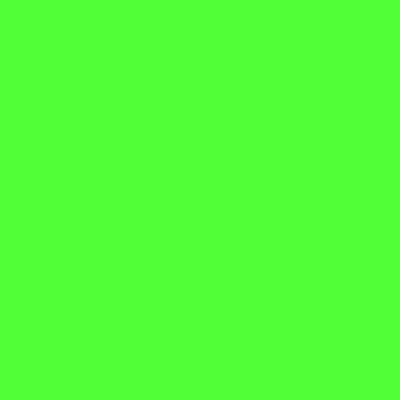
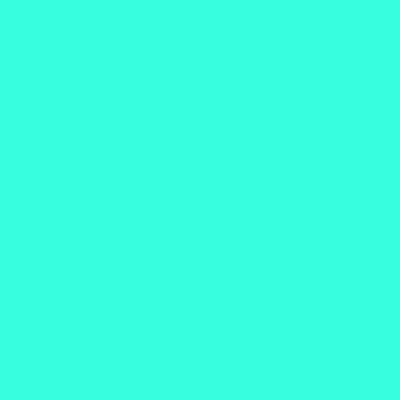
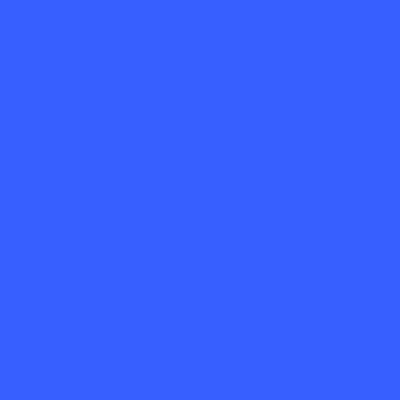
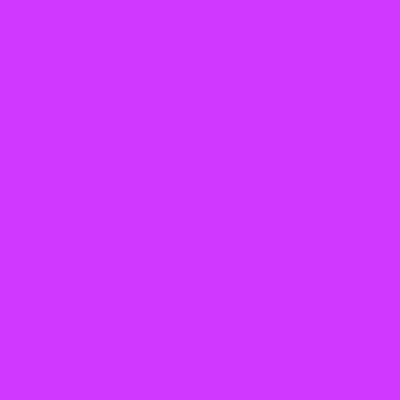
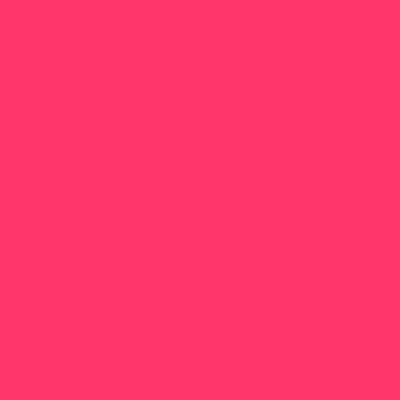
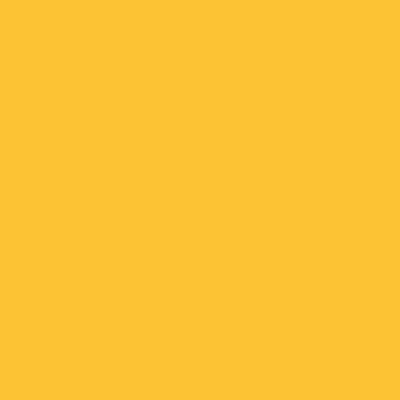
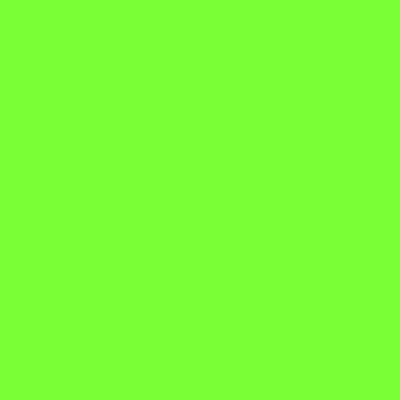
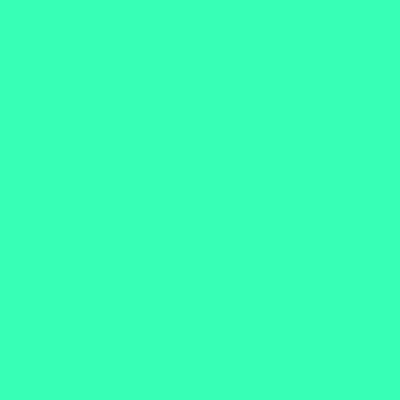
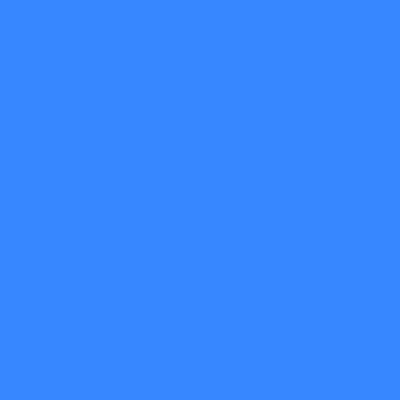
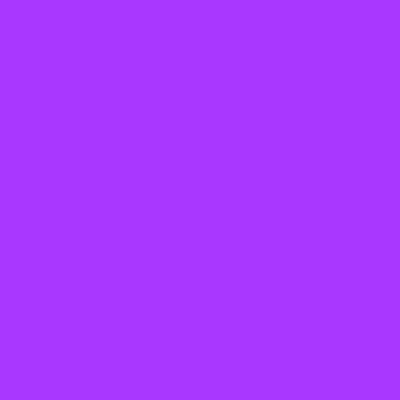
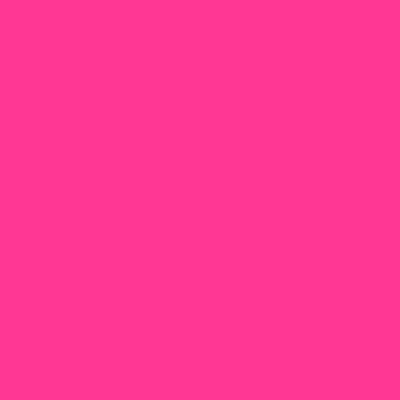
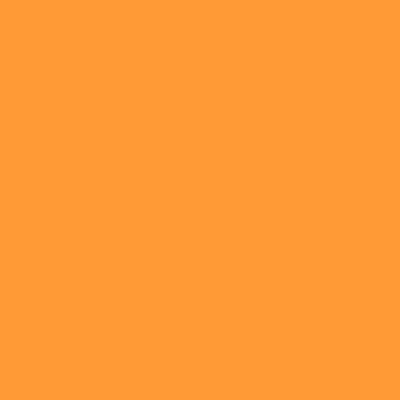
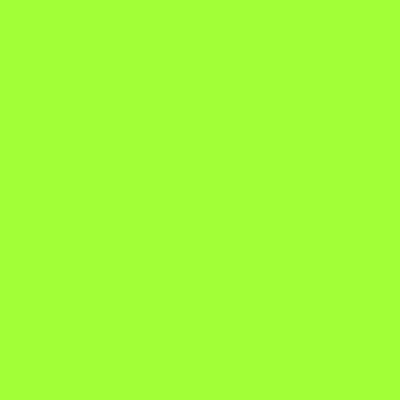
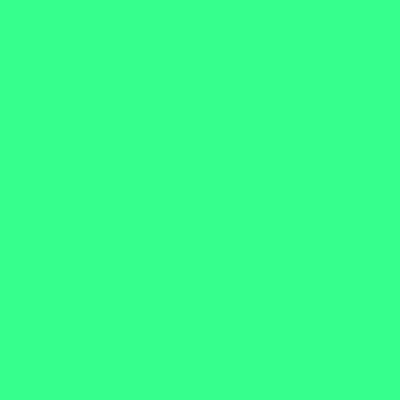
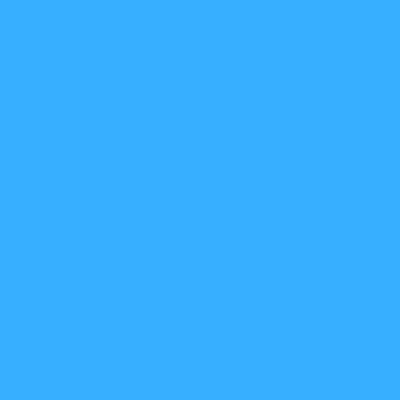
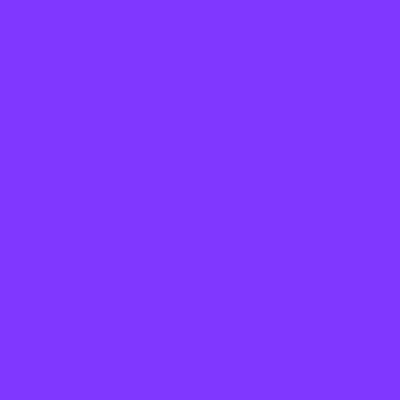

In [5]:
va.test_dnn_2(class_colors)
va.show(*[(np.array(c).reshape(1,1,3), str(i)) for i, c in enumerate(class_colors)], max_per_row=20)

Si analizzi ora il codice della funzione definita nella cella seguente: consente di disegnare un rettangolo su un'immagine con il colore corrispondente a una classe, scrivendo eventualmente il nome della classe e un valore di confidenza. Si osservi l'esempio di utilizzo nella cella seguente, eventualmente eseguendo dei test in altre celle, per comprenderne appieno il funzionamento.

In [6]:
def draw_object(img, class_index, confidence, rect, show_info):
    color, font, font_size = class_colors[class_index], cv.FONT_HERSHEY_PLAIN, 0.75
    x, y, w, h = rect    
    cv.rectangle(img, (x,y), (x+w,y+h), color, 2)    
    if show_info:
        name = class_names[class_index]
        (sx,sy), baseline = cv.getTextSize(name, font, font_size, 1)
        cv.rectangle(img, (x,y), (x+sx, y+sy*2+11), color, -1)
        cv.putText(img, name, (x,y+baseline+6), font, font_size, (0,0,0), lineType=cv.LINE_AA)
        cv.putText(img, f'{confidence:.0%}', (x,y+baseline+12+sy), font, font_size, (0,0,0), lineType=cv.LINE_AA)


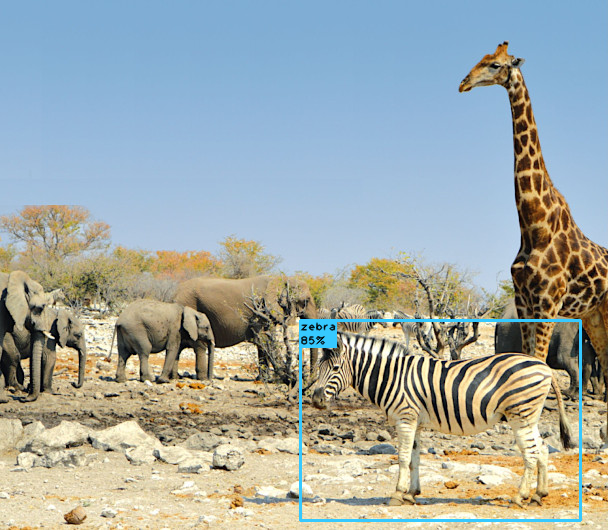

In [7]:
# Si supponga che all'interno dell'immagine "dnn/safari.jpg", un'oggetto della classe 22 (zebra) 
# sia stato individuato con confidenza del 85% nel rettangolo (300, 320, 280, 200).

img = cv.imread("dnn/safari.jpg")
draw_object(img, 22, 0.85, (300, 320, 280, 200), True)
va.show(img)


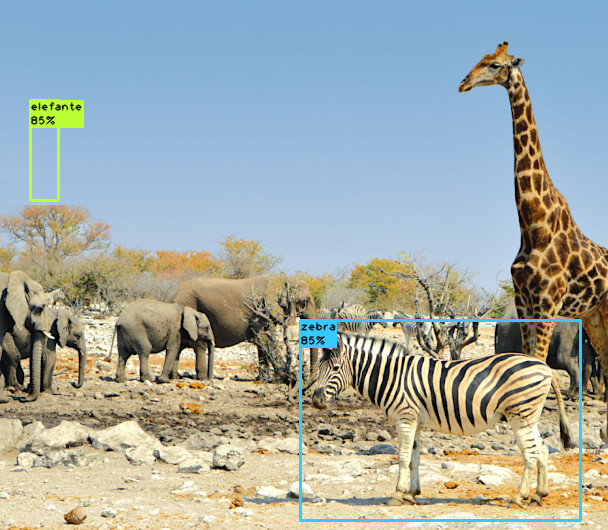

In [8]:
img = cv.imread("dnn/safari.jpg")
draw_object(img, 22, 0.85, (300, 320, 280, 200), True)
draw_object(img, 20, 0.85, (30, 100, 28, 100), True)
va.show(img)

<img style="float:left" src="images/ar.png" />**Esercizio 3** - Come mostrato nelle dispense, per fornire un'immagine in ingresso alla rete, questa deve essere trasformata in un 'blob' mediante la funzione `cv.dnn.blobFromImage()`, che nel caso di Yolo dovrà essere chiamata con i parametri specificati nella cella seguente: fattore di scala pari a 1.0/255, dimensioni 320x320 e scambio dei canali R e B (la nostra immagine è in formato BGR, mentre la rete si aspetta RGB). Nel caso l'immagine non abbia le dimensioni 320x320, `cv.dnn.blobFromImage()` provvede a ridimensionarla, ma senza preservarne l'aspect ratio. Al fine di evitare deformazioni che potrebbero penalizzare l'accuratezza del riconoscimento, completare la funzione nella cella seguente, calcolando l'eventuale bordo da aggiungere orizontalmente (`border_w`) o verticalmente (`border_h`), in modo da rendere l'immagine `img` quadrata. Si noti che uno dei due valori `border_w` o `border_h` dovrà sempre essere zero: saranno entrambi zero solo se l'immagine è già quadrata. Creare quindi una nuova immagine `padded_img`, aggiungendo `border_w` pixel sia a sinistra che a destra e `border_h` pixel sia in alto che in basso: i pixel aggiunti dovranno essere neri. 

N.B. in alto e a sinistra dovranno essere aggiunti esattamente `border_h` e `border_w` pixel, a destra e in basso può essere necessario aggiungere un pixel in più nel caso in cui il numero totale di pixel da aggiungere sia dispari.

In [9]:
# --- Svolgimento Esercizio 3: Inizio --- #

def prepare_input_blob(img: np.ndarray):
    # print(img.shape)
    h, w = img.shape[:2]
    # print(h, w)

    border_w = (h - w)//2 if h > w else 0
    border_h = (w - h)//2 if w > h else 0
    # print(border_h, border_w)

    padded_img = np.zeros((h+border_h*2, w+border_w*2, 3), dtype=np.uint8)
    # for channel in range(3):
        # padded_img[border_h:border_h+h, border_w:border_w+w, channel] = img[:,:,channel]
    padded_img[border_h:border_h+h, border_w:border_w+w, :] = img[:,:,:]
    # print(padded_img.shape)
    # print(padded_img.dtype)
    # print(img.dtype)

    #Sol:
    # size = max(height, width)
    # padded_img = cv.copyMakeBorder(img, border_h, size-height-border_h, border_w, size-width-border_w, cv.BORDER_CONSTANT)
   
    return border_w, border_h, padded_img.shape[0], cv.dnn.blobFromImage(padded_img, 1.0 / 255, (320, 320), swapRB = True)

# --- Svolgimento Esercizio 3: Fine --- #


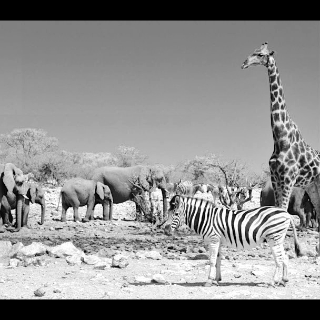
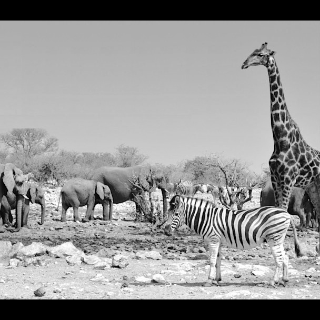
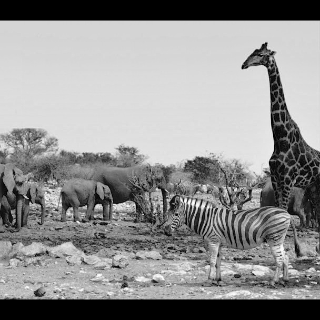

In [10]:
img = cv.imread("dnn/safari.jpg")
border_w, border_h, size, blob = prepare_input_blob(img)
va.show(*blob[0])

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente permette di visualizzare il contenuto del blob e di verificare che il suo contenuto sia esatto.


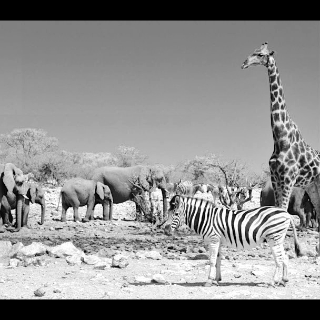
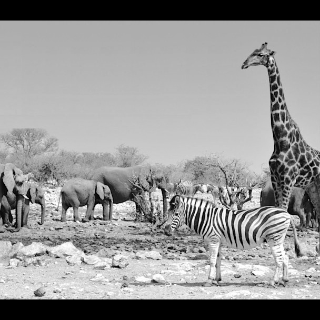
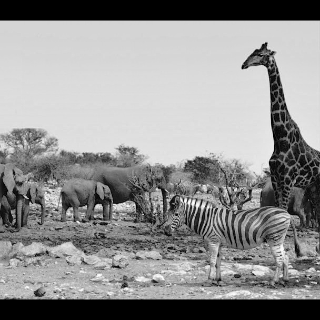

In [11]:
img = cv.imread("dnn/safari.jpg")
border_w, border_h, size, blob = prepare_input_blob(img)
va.test_dnn_3(border_w, border_h, blob)
va.show(*blob[0])

La cella seguente utilizza la funzione appena realizzata per predisporre l'immagine `img`, la fornisce in input alla rete ed esegue il passo di inferenza con il metodo `forward()`, per ottenere i corrispondenti output. La rete che stiamo utilizzando ha più di un livello di output: si noti come viene utilizzato il metodo `getUnconnectedOutLayersNames()` per ottenere i nomi di tali livelli, in modo da ottenere tutti i corrispondenti output. La cella stampa a video il nome di ciascun livello di output e la dimensione del corrispondente array con i valori di output.

In [12]:
border_w, border_h, size, blob = prepare_input_blob(img)    
net.setInput(blob)

out_names = net.getUnconnectedOutLayersNames()
out_values = net.forward(out_names)

for n, v in zip(out_names, out_values):
    print(f"L'output del livello {n} ha dimensioni {v.shape}")

L'output del livello yolo_82 ha dimensioni (300, 85)
L'output del livello yolo_94 ha dimensioni (1200, 85)
L'output del livello yolo_106 ha dimensioni (4800, 85)


I tre livelli di output della rete corrispondono a tre diverse scale, utilizzate per individuare oggetti di dimensioni differenti, come mostrato nella figura seguente.
![](dnn/scales.png)
Si noti che i "box" non corrispondono alle celle in cui è suddivisa l'immagine. Per ogni box (ossia un possibile rettangolo contenente un oggetto), gli 85 valori di output hanno il seguente significato:
* $t_x, t_y$: valori da cui si possono ricavare le coordinate del centro del box;
* $t_w, t_h$: valori da cui si possono ricavare larghezza e altezza del box;
* $p_o$: *objectness score*, probabilità che il box contenga effettivamente un oggetto;
* $s_0, s_1, ..., s_{79}$: *class scores*, probabilità che il box contenga un'oggetto della relativa classe.

Utilizzando YOLO con OpenCV, i valori $t_x, t_y, t_w, t_h$, che originariamente sono legati alle celle, vengono restituiti già modificati in modo da essere dei valori fra 0 e 1 relativi alle dimensioni dell'immagine: le coordinate in pixel di ciascun box possono essere quindi ottenute nello stesso modo per ciascuna scala, come mostrato nell'esempio seguente.
![](dnn/box.png)

<img style="float:left" src="images/ar.png" />**Esercizio 4** - Partendo dai risultati dell'esecuzione delle ultime celle, in particolare dal contenuto delle variabili `border_w`, `border_h`, `size`, `out_values`, si ottengano le seguenti informazioni dalla riga 231 del primo dei tre livelli di output della rete i cui valori sono già in `out_values`:
* `(x, y, w, h)`, coordinate in pixel del rettangolo relativamente alle dimensioni dell'immagine originale `img`;
* `class_index`, indice della classe che ha ottenuto lo score più elevato (dovrà risultare 22);
* `confidence`, lo score della classe.

Il procedimento è analogo a quanto mostrato nella figura precedente, con alcune differenze:
* la dimensione dell'immagine non è 320, ma è quanto contenuto nella variabile `size`;
* le coordinate `x, y` in questo caso non sono quelle del centro del rettangolo, ma del vertice in alto a sinistra;
* nell'ottenere il valore finale di `x, y`, si deve anche tenere conto che, per rendere l'immagine quadrata, era stato aggiunto un bordo (`border_w`, `border_h`) e le coordinate, per essere applicabili all'immagine originale, dovranno essere corrette di conseguenza.

Una volta ottenuti i valori richiesti, copiare `img` in una nuova immagine `res` e disegnare le informazioni sull'oggetto chiamando la funzione `draw_object()` definita in precedenza.

In [13]:
# --- Svolgimento Esercizio 4: Inizio --- #

# x, y, w, h, confidence = ..., ..., ..., ..., ...
# print(out_values)
# print(out_values[0][231])
x, y, w, h = out_values[0][231][:4].tolist()
confidences = out_values[0][231][5:].tolist()
# print(confidences)
confidence = np.max(confidences)
class_index = np.argmax(confidences)
res = img.copy()

print(x, y, w, h, class_index, confidence)
x = int(x * size)
y = int(y * size)
w = int(w * size)
h = int(h * size)
x -= border_w
y -= border_h
print(border_h, border_w)
print(x, y, w, h, class_index, confidence)

draw_object(res, class_index, confidence, (x-w//2, y-h//2, w, h), True)

# Sol:
# box = out_values[0][231]
# x, y, w, h = (box[:4] * size).round().astype(np.int_).tolist()
# class_index = np.argmax(box[5:])
# confidence = float(box[5+class_index])
# res = img.copy()
# x -= w//2
# y -= h//2
# w -= border_w
# y -= border_h
# draw_object(res, class_index, confidence, (x, y, w, h), True)

# --- Svolgimento Esercizio 4: Fine --- #

0.7209806442260742 0.7479802370071411 0.4082706570625305 0.3016756474971771 22 0.9992402195930481
39 0
438 415 248 183 22 0.9992402195930481


<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente visualizza il risultato ottenuto a fianco di quello corretto.


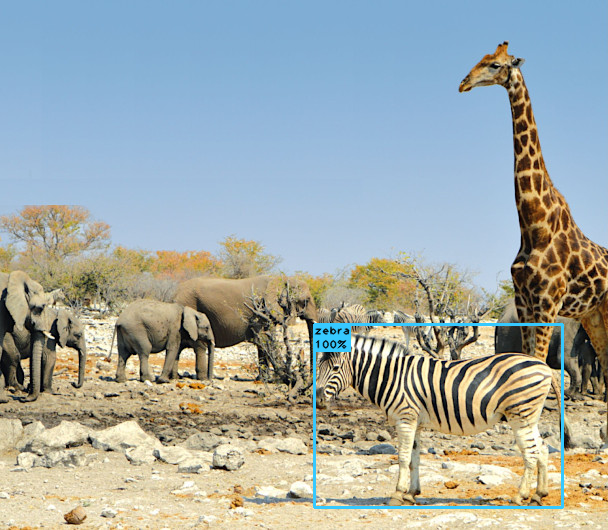
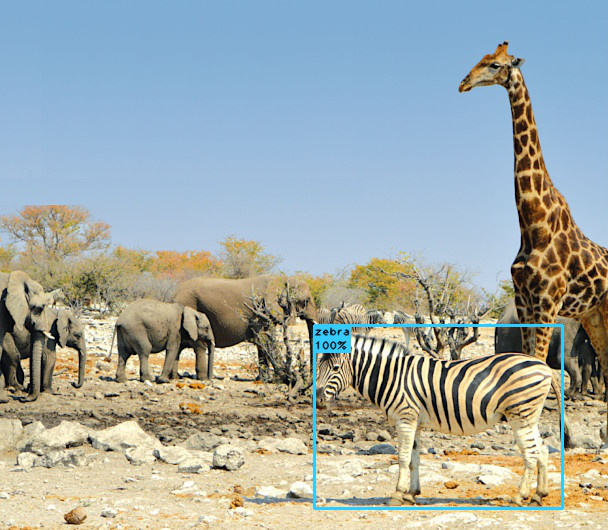

In [14]:
va.show((res, 'Risultato ottenuto'), (cv.imread('dnn/res_4.jpg'), 'Risultato atteso'))

<img style="float:left" src="images/ar.png" />**Esercizio 5** - Grazie all'esperienza maturata negli esercizi precedenti, completare la funzione `yolo_detection(image, conf_threshold)` che, ricevuti in input un'immagine e una soglia fra 0 e 1:
* prepara l'input per la rete utilizzando `prepare_input_blob()`;
* esegue la rete neurale su tale input;
* analizza quanto ottenuto dai 3 livelli di output e, restituisce tre liste `class_indices`, `confidences`, `detected_objects`, contenenti, rispettivamente, gli indici delle classi, gli score e i rettangoli (tuple x, y, w, h) di tutti i box che hanno uno score maggiore o uguale a `conf_threshold`. Per ogni box considerare solo lo score con valore massimo.

In [15]:
# --- Svolgimento Esercizio 5: Inizio --- #

def yolo_detection(image, conf_threshold):
    border_w, border_h, size, blob = prepare_input_blob(image)    
    net.setInput(blob)

    out_names = net.getUnconnectedOutLayersNames()
    out_values = net.forward(out_names)

    # class_indices, confidences, detected_objects = [..., ..., ...], [..., ..., ...], [(..., ..., ..., ...), ...]
    class_indices, confidences, detected_objects = [], [], []

    # print(out_values)
    for out in out_values:
        pass

    return class_indices, confidences, detected_objects

# --- Svolgimento Esercizio 5: Fine --- #

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente visualizza il risultato ottenuto a fianco di quello corretto. Si noti che la giraffa viene individuata due volte, a due scale differenti: questo problema verrà affrontato nel prossimo esercizio.


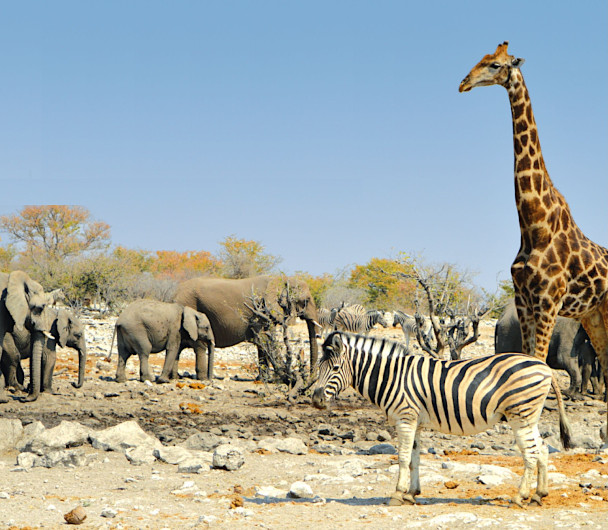
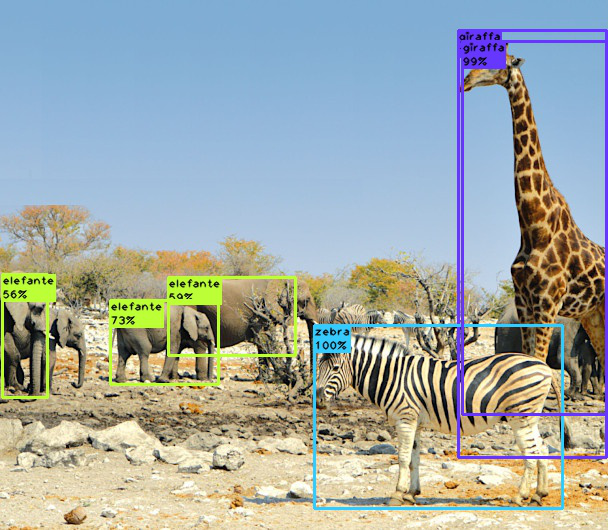

In [16]:
res = img.copy()
for i, c, r in zip(*yolo_detection(img, 0.4)):
    draw_object(res, i, c, r, True)
va.show((res, 'Risultato ottenuto'), (cv.imread('dnn/res_5.jpg'), 'Risultato atteso'))

<img style="float:left" src="images/ar.png" />**Esercizio 6** - Implementare una nuova funzione `yolo_detection_nms(image, conf_threshold, nms_threshold)` che si comporti in modo analogo a `yolo_detection()`, ma applichi anche la funzione OpenCV `cv.dnn.NMSBoxes()` per filtrare i risultati di `yolo_detection()`, eliminando oggetti che si sovrappongono troppo (rispetto alla soglia `nms_threshold`) ad altri oggetti con valore di confidenza maggiore. Prestare attenzione al valore di ritorno di `cv.dnn.NMSBoxes()`: l'array di indici che restituisce ha una dimensione a 1 "di troppo". Inoltre è necessario gestire anche il caso in cui nessun oggetto soddisfi i criteri: in tal caso `cv.dnn.NMSBoxes()` restituisce una tupla vuota invece di un array NumPy: verificare che questo non crei problemi alla implementazione proposta.

In [17]:
# --- Svolgimento Esercizio 6: Inizio --- #

def yolo_detection_nms(image, conf_threshold, nms_threshold):
    class_indices, confidences, detected_objects = yolo_detection(image, conf_threshold)
    # Sol:
    # np.ravel per eliminare la dimensione di troppo
    indices = np.ravel(cv.dnn.NMSBoxes(detected_objects, confidences, conf_threshold, nms_threshold))
    return [class_indices[i] for i in indices], [confidences[i] for i in indices], [detected_objects[i] for i in indices]

# --- Svolgimento Esercizio 6: Fine --- #

<img style="float:left" src="images/in.png" />La cella seguente consente di provare la funzione su alcune immagini variando i parametri: assicurarsi che il risultato sia ragionevole e non ci siano errori di esecuzione anche nei casi limite (soglie a zero o a uno).

In [18]:
@interact(image_name=['safari', 'cd', 'el', 'tb', 'cb', 'mc', 'spam'], 
        conf_threshold = (0,1,0.1), nms_threshold = (0,1,0.1), info = True)
def test_yolo(image_name = 'safari', conf_threshold = 0.4, nms_threshold = 0.5, info = True):
    img = cv.imread(f'dnn/{image_name}.jpg')
    for i, c, r in zip(*yolo_detection_nms(img, conf_threshold, nms_threshold)):
        draw_object(img, i, c, r, info)
    va.show(img)

interactive(children=(Dropdown(description='image_name', options=('safari', 'cd', 'el', 'tb', 'cb', 'mc', 'spa…